In [20]:
from dotenv import load_dotenv
from sqlalchemy import create_engine, text
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [21]:
load_dotenv()

db_url=os.getenv("database_url")
engine=create_engine(db_url)

In [22]:
query= text("SELECT * FROM film LIMIT 5")
with engine.connect() as con:
    result=con.execute(query)
    for rows in result:
        print(rows)
        #or print(rows.title) for specific columns

''' 
we can also use 
df = pd.read_sql(query- with statement inside text() or without text(), engine)
print(df)
'''



(1, 'ACADEMY DINOSAUR', 'A Epic Drama of a Feminist And a Mad Scientist who must Battle a Teacher in The Canadian Rockies', 2006, 1, None, 6, Decimal('0.99'), 86, Decimal('20.99'), 'PG', datetime.datetime(2006, 2, 15, 5, 3, 42), ['Deleted Scenes', 'Behind the Scenes'], "'academi':1 'battl':15 'canadian':20 'dinosaur':2 'drama':5 'epic':4 'feminist':8 'mad':11 'must':14 'rocki':21 'scientist':12 'teacher':17")
(2, 'ACE GOLDFINGER', 'A Astounding Epistle of a Database Administrator And a Explorer who must Find a Car in Ancient China', 2006, 1, None, 3, Decimal('4.99'), 48, Decimal('12.99'), 'G', datetime.datetime(2006, 2, 15, 5, 3, 42), ['Trailers', 'Deleted Scenes'], "'ace':1 'administr':9 'ancient':19 'astound':4 'car':17 'china':20 'databas':8 'epistl':5 'explor':12 'find':15 'goldfing':2 'must':14")
(3, 'ADAPTATION HOLES', 'A Astounding Reflection of a Lumberjack And a Car who must Sink a Lumberjack in A Baloon Factory', 2006, 1, None, 7, Decimal('2.99'), 50, Decimal('18.99'), 'NC-17

' \nwe can also use \ndf = pd.read_sql(query- with statement inside text() or without text(), engine)\nprint(df)\n'

In [ ]:
query = ''' SELECT 
    a.actor_id,
    CONCAT(a.first_name, ' ', a.last_name) AS name,
    SUM(p.amount) AS total_revenue
FROM actor a
JOIN film_actor fa ON a.actor_id = fa.actor_id
JOIN film f ON f.film_id = fa.film_id
JOIN inventory i ON f.film_id = i.film_id
JOIN rental r ON i.inventory_id = r.inventory_id
JOIN payment p ON r.rental_id = p.rental_id
GROUP BY a.actor_id, a.first_name, a.last_name
ORDER BY total_revenue DESC
LIMIT 10;

;
 '''

result=engine.connect().execute(text(query))
for rows in result:
    print(rows)

(107, 'GINA DEGENERES', Decimal('3442.49'))
(181, 'MATTHEW CARREY', Decimal('2742.19'))
(198, 'MARY KEITEL', Decimal('2690.24'))
(81, 'SCARLETT DAMON', Decimal('2655.28'))
(102, 'WALTER TORN', Decimal('2620.62'))
(144, 'ANGELA WITHERSPOON', Decimal('2614.46'))
(58, 'CHRISTIAN AKROYD', Decimal('2611.49'))
(60, 'HENRY BERRY', Decimal('2602.88'))
(28, 'WOODY HOFFMAN', Decimal('2546.40'))
(111, 'CAMERON ZELLWEGER', Decimal('2529.41'))


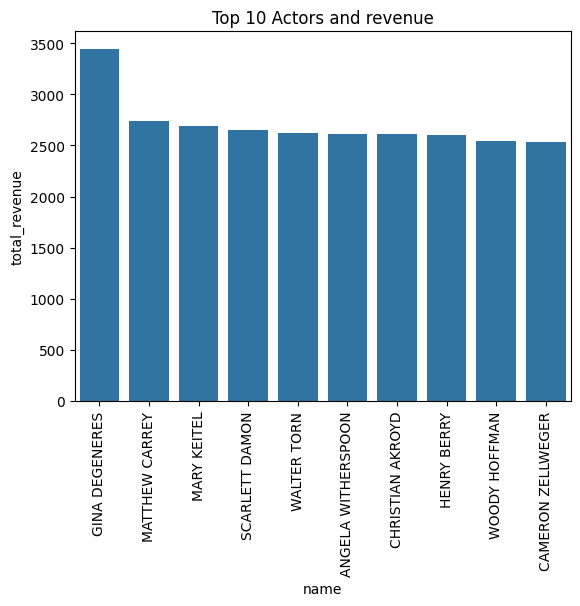

In [ ]:
query = ''' SELECT 
    a.actor_id,
    CONCAT(a.first_name, ' ', a.last_name) AS name,
    SUM(p.amount) AS total_revenue
FROM actor a
JOIN film_actor fa ON a.actor_id = fa.actor_id
JOIN film f ON f.film_id = fa.film_id
JOIN inventory i ON f.film_id = i.film_id
JOIN rental r ON i.inventory_id = r.inventory_id
JOIN payment p ON r.rental_id = p.rental_id
GROUP BY a.actor_id, a.first_name, a.last_name
ORDER BY total_revenue DESC
LIMIT 10;

;
 '''

result=engine.connect().execute(text(query))
#result is an iterator — once you loop through it or fetchall() from it, it’s consumed.

df=pd.DataFrame(result.fetchall(), columns=result.keys())
sns.barplot(data=df,x="name",y="total_revenue")
plt.title("Top 10 Actors and revenue")
plt.xticks(rotation=90)
plt.show()